# Практическая работа №2: Обработка выборочных данных. Нахождение точечных оценок параметров распределения

Выполнили студенты гр. 9382 Рыжих Роман и Сорочина Мария. Вариант №2

## Цель работы

Получение практических навыков нахождения точечных статистических оценок параметров распределения.

## Основные теоретические положения

**Статистической оценкой** $\theta^*$ неизвестного параметра теоретического распределения $\theta$ называется функция от наблюдаемых значений случайной величины:

$\theta^* = f(x_1,x_2,...,x_n)$

**Точечные статистические оценки** - статистические оценки, определяемые одним числом

Для того, чтобы оценки были достаточно надёжными, к ним предъявляются требования **несмещённости, состоятельности и эффективности**

Оценка называется **несмещённой**, если её математическое ожидание равно оцениваемому параметру $\theta$ при любом объёме выборки n

Оценка называется **эффективной**, если при заданном объёме выборки n она имеет наименьшую возможную дисперсию

Оценка называется **состоятельной**, если она сходится по вероятности к оцениваемому параметру при неограниченном возрастании объёма выборки

**Метод моментов** - метод оценки неизвестных параметров распределения, основанный на предполагаемых свойствах моментов. Идея заключается в замене истинных соотношений выборочными аналогами

Для упрощения вычислений эмпирических моментов вводят **условные варианты**

$u_j=\frac{x_j-C}{h}$

, где C - условный ноль, h - шаг

В результате, все условные варианты оказываются целыми числами

**Выборочное среднее**: $\overline{x_в} = \overline{M_1} = \overline{M_1^*}h + C$

**Выборочная дисперсия**: $D_в = \overline{m_2} = \frac{1}{N}\sum{n_j(x_j - \overline{x_в})^2}$

Статистическая оценка дисперсии является смещённой оценкой. Поэтому следует использовать исправленную оценку дисперсии.

**Исправленная выборочная дисперсия**: $s^2 = \frac{N}{N-1}D_в$

**Выборочное СКО**: $\sigma_в = \sqrt{D_в}$

**Исправленное СКО**: $s = \sqrt{s^2}$

**Выборочная асимметрия**: $\overline{A_s} = \frac{\overline{m_3}}{s^3}$

**Эксцесс**: $\overline{E} = \frac{\overline{m_4}}{s^4}-3$

## Постановка задачи

Для заданных выборочных данных вычислить с использованием метода моментов и условных вариант точечные статистические оценки математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии и эксцесса исследуемой случайной величины. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Подготовка к выполнению работы

Возьмём датасет из практической работы №1

In [1]:
import pandas as pd
import numpy as np
import math
from IPython.display import display, HTML
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_dataset.csv')
df1 = df[np.isnan(df['Age'])]
data = df.drop(df1.index, axis=0)[:115][['Age', 'Fare']]

data.to_csv('data.csv', index=False)

k = 1 + math.floor(3.31 * math.log10(len(data)))

#### Интервалы, их середины и частота попадания для первого признака (Age)

In [2]:
feature1 = data.loc[:, ['Age']]
ranked1 = feature1.sort_values(by='Age').set_index(pd.Index([i for i in range(1, 116)]))

x_min1 = ranked1['Age'][1]
x_max1 = ranked1['Age'][115]
h1 = math.ceil((x_max1 - x_min1) / k)

bins1 = np.arange(x_min1, x_max1+h1, h1)
cuted1 = pd.cut(ranked1["Age"], bins1, right=False)

intervals1 = ranked1.groupby(cuted1, as_index=False)['Age'].count()
intervals1 = intervals1.rename(columns={'Age': 'частота попадания'})

cuted1 = sorted(list(set(cuted1)), key=lambda x: x.left) 

intervals1['interval'] = cuted1
intervals1["середина интервала"] = [i.right-h1/2 for i in cuted1]
intervals1['относительная частота'] = intervals1['частота попадания'] / len(data)
#intervals1 = intervals1.drop(['частота попадания'], axis=1)
intervals1.iloc[:, [1, 2,3]].set_index(pd.Index([i for i in range(1, 8)]))


,interval,середина интервала,относительная частота
1,"[1.0, 12.0)",6.5,0.052174
2,"[12.0, 23.0)",17.5,0.243478
3,"[23.0, 34.0)",28.5,0.365217
4,"[34.0, 45.0)",39.5,0.147826
5,"[45.0, 56.0)",50.5,0.121739
6,"[56.0, 67.0)",61.5,0.052174
7,"[67.0, 78.0)",72.5,0.017391


In [3]:
age_intervals = intervals1['interval']
intervals1 = intervals1.drop(['interval'], axis=1)
#age_intervals

#### Интервалы, их середины и частота попадания для второго признака (Fare)

In [4]:
feature2 = data.loc[:, ['Fare']]
ranked2 = feature2.sort_values(by='Fare').set_index(pd.Index([i for i in range(1, 116)]))

x_min2 = ranked2['Fare'][1]
x_max2 = ranked2['Fare'][115]
h2 = math.ceil((x_max2 - x_min2) / k)

bins2 = np.arange(x_min2, x_max2+h2, h2)
cuted2 = pd.cut(ranked2["Fare"], bins2, right=False)

intervals2 = ranked2.groupby(cuted2, as_index=False)['Fare'].count()
intervals2 = intervals2.rename(columns={'Fare': 'частота попадания'})


cuted2 = [(round(bins2[i], 4), round(bins2[i+1], 4)) for i in range(len(bins2) - 1)]

intervals2['interval'] = cuted2
intervals2["середина интервала"] = [i[1]-h2/2 for i in cuted2]
intervals2['относительная частота'] = intervals2['частота попадания'] / len(data)
#intervals2 = intervals2.drop(['частота попадания'], axis=1)

intervals2.iloc[:, [1, 2, 3]].set_index(pd.Index([i for i in range(1, 8)]))

,interval,середина интервала,относительная частота
1,"(3.1708, 41.1708)",22.1708,0.756522
2,"(41.1708, 79.1708)",60.1708,0.139130
3,"(79.1708, 117.1708)",98.1708,0.008696
4,"(117.1708, 155.1708)",136.1708,0.008696
5,"(155.1708, 193.1708)",174.1708,0.000000
6,"(193.1708, 231.1708)",212.1708,0.034783
7,"(231.1708, 269.1708)",250.1708,0.052174


In [5]:
fare_intervals = intervals2['interval']
intervals2 = intervals2.drop(['interval'], axis=1)

### Для середин интервального ряда, полученного в практической работе №1, вычислим условные варианты.

#### Для первого признака (Age)

h(шаг) = 17.5 - 6.5 = 11

C(ложный нуль) - варианта с наибольшей частотой = 28.5

In [6]:
intervals1 = intervals1.rename({'середина интервала': 'xi', 'относительная частота': 'ni'}, axis=1)

h1 = intervals1['xi'][1] - intervals1['xi'][0]
C1 = intervals1.idxmax(axis=0)['ni']
C1 = intervals1['xi'][C1]

intervals1["ui"] = [(i-C1)/h1 for i in intervals1['xi']]
intervals1["ni*ui"] = [intervals1['ni'][i]*intervals1['ui'][i] for i in range(len(intervals1))]
intervals1["ni*ui^2"] = [intervals1['ni'][i]*(intervals1['ui'][i]**2) for i in range(len(intervals1))]
intervals1["ni*ui^3"] = [intervals1['ni'][i]*(intervals1['ui'][i]**3) for i in range(len(intervals1))]
intervals1["ni*ui^4"] = [intervals1['ni'][i]*(intervals1['ui'][i]**4) for i in range(len(intervals1))]
intervals1["ni*(ui+1)^4"] = [intervals1['ni'][i]*((intervals1['ui'][i]+1)**4) for i in range(len(intervals1))]

sums1 = []

for name, values in intervals1.iloc[:,:].iteritems():
    sums1.append(sum(intervals1[name]))

intervals1.loc[len(intervals1.index)] = sums1

intervals1.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]].set_index(pd.Index(list('1234567Σ')))

,частота попадания,xi,ni,ui,ni*ui,ni*ui^2,ni*ui^3,ni*ui^4,ni*(ui+1)^4
1,6.0,6.5,0.052174,-2.0,-0.104348,0.208696,-0.417391,0.834783,0.052174
2,28.0,17.5,0.243478,-1.0,-0.243478,0.243478,-0.243478,0.243478,0.000000
3,42.0,28.5,0.365217,0.0,0.000000,0.000000,0.000000,0.000000,0.365217
4,17.0,39.5,0.147826,1.0,0.147826,0.147826,0.147826,0.147826,2.365217
5,14.0,50.5,0.121739,2.0,0.243478,0.486957,0.973913,1.947826,9.860870
6,6.0,61.5,0.052174,3.0,0.156522,0.469565,1.408696,4.226087,13.356522
7,2.0,72.5,0.017391,4.0,0.069565,0.278261,1.113043,4.452174,10.869565
Σ,115.0,276.5,1.000000,7.0,0.269565,1.834783,2.982609,11.852174,36.869565


In [7]:
contr_sum1 = 1 + 4*intervals1['ni*ui'][len(intervals1.index)-1] + 6*intervals1['ni*ui^2'][len(intervals1.index)-1] + \
            4*intervals1['ni*ui^3'][len(intervals1.index)-1] + intervals1['ni*ui^4'][len(intervals1.index)-1]
print(contr_sum1)
print(contr_sum1 == intervals1['ni*(ui+1)^4'][len(intervals1.index)-1])

36.869565217391305
True


Сумма относительных частот равна 1 (верно)

Последним действием было проверено, что контрольная сумма совпадает

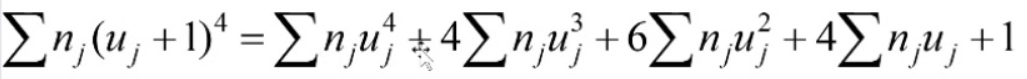

Следовательно, расчёты верны

#### Для второго признака (Fare)

h(шаг) = 60.1708 - 22.1708 = 38

C(ложный нуль) - варианта с наибольшей частотой = 22.1708

In [8]:
intervals2 = intervals2.rename({'середина интервала': 'xi', 'относительная частота': 'ni'}, axis=1)

h2 = intervals2['xi'][1] - intervals2['xi'][0]
C2 = intervals2.idxmax(axis=0)['ni']
C2 = intervals2['xi'][C2]
print(h2, C2)

intervals2["ui"] = [(i-C2)/h2 for i in intervals2['xi']]
intervals2["ni*ui"] = [intervals2['ni'][i]*intervals2['ui'][i] for i in range(len(intervals2))]
intervals2["ni*ui^2"] = [intervals2['ni'][i]*(intervals2['ui'][i]**2) for i in range(len(intervals2))]
intervals2["ni*ui^3"] = [intervals2['ni'][i]*(intervals2['ui'][i]**3) for i in range(len(intervals2))]
intervals2["ni*ui^4"] = [intervals2['ni'][i]*(intervals2['ui'][i]**4) for i in range(len(intervals2))]
intervals2["ni*(ui+1)^4"] = [intervals2['ni'][i]*((intervals2['ui'][i]+1)**4) for i in range(len(intervals2))]

sums2 = []

for name, values in intervals2.iloc[:,:].iteritems():
    sums2.append(sum(intervals2[name]))

intervals2.loc[len(intervals2.index)] = sums2

intervals2.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]].set_index(pd.Index(list('1234567Σ')))

38.0 22.1708


,частота попадания,xi,ni,ui,ni*ui,ni*ui^2,ni*ui^3,ni*ui^4,ni*(ui+1)^4
1,87.0,22.1708,0.756522,0.0,0.000000,0.000000,0.000000,0.000000,0.756522
2,16.0,60.1708,0.139130,1.0,0.139130,0.139130,0.139130,0.139130,2.226087
3,1.0,98.1708,0.008696,2.0,0.017391,0.034783,0.069565,0.139130,0.704348
4,1.0,136.1708,0.008696,3.0,0.026087,0.078261,0.234783,0.704348,2.226087
5,0.0,174.1708,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,4.0,212.1708,0.034783,5.0,0.173913,0.869565,4.347826,21.739130,45.078261
7,6.0,250.1708,0.052174,6.0,0.313043,1.878261,11.269565,67.617391,125.269565
Σ,115.0,953.1956,1.000000,21.0,0.669565,3.000000,16.060870,90.339130,176.260870


In [9]:
contr_sum2 = 1 + 4*intervals2['ni*ui'][len(intervals2.index)-1] + 6*intervals2['ni*ui^2'][len(intervals2.index)-1] + \
            4*intervals2['ni*ui^3'][len(intervals2.index)-1] + intervals2['ni*ui^4'][len(intervals2.index)-1]
print(contr_sum2)
print(contr_sum2 == intervals2['ni*(ui+1)^4'][len(intervals2.index)-1])

176.26086956521738
True


Сумма относительных частот равна 1 (верно)

Последним действием было проверено, что контрольная сумма совпадает

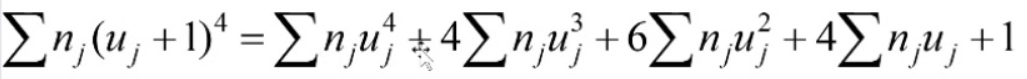

Следовательно, расчёты верны

### Вычислить условные эмпирические моменты $ν^*_i$ через условные варианты. С помощью условных эмпирических моментов вычислить центральные эмпирические моменты $μ^∗_i$.

#### Для первого признака (Age)

In [10]:
table1 = intervals1.drop(len(intervals1.index)-1, axis=0)
table1

,частота попадания,xi,ni,ui,ni*ui,ni*ui^2,ni*ui^3,ni*ui^4,ni*(ui+1)^4
0,6.0,6.5,0.052174,-2.0,-0.104348,0.208696,-0.417391,0.834783,0.052174
1,28.0,17.5,0.243478,-1.0,-0.243478,0.243478,-0.243478,0.243478,0.000000
2,42.0,28.5,0.365217,0.0,0.000000,0.000000,0.000000,0.000000,0.365217
3,17.0,39.5,0.147826,1.0,0.147826,0.147826,0.147826,0.147826,2.365217
4,14.0,50.5,0.121739,2.0,0.243478,0.486957,0.973913,1.947826,9.860870
5,6.0,61.5,0.052174,3.0,0.156522,0.469565,1.408696,4.226087,13.356522
6,2.0,72.5,0.017391,4.0,0.069565,0.278261,1.113043,4.452174,10.869565


In [11]:
M1 = sum(table1["ni*ui"])
M2 = sum(table1["ni*ui^2"])
M3 = sum(table1["ni*ui^3"])
M4 = sum(table1["ni*ui^4"])
print('Условные эмперические моменты:')
print('M1 = ', M1)
print('M2 = ', M2)
print('M3 = ', M3)
print('M4 = ', M4)

XB1 = M1*h1 + C1
#print(XB1)

m1_test = 0
m2_test = 0
m3_test = 0
m4_test = 0

m2 = (M2 - M1**2)*h1**2
m3 = (M3 - 3*M2*M1 + 2*M1**3)*h1**3
m4 = (M4 - 4*M3*M1 + 6*M2*M1**2 - 3*M1**4)*h1**4

for i in range(0,7):
    m1_test += (table1["xi"][i]-XB1)*table1["ni"][i]
    m2_test += (table1["xi"][i]-XB1)**2*table1["ni"][i]
    m3_test += (table1["xi"][i]-XB1)**3*table1["ni"][i]
    m4_test += (table1["xi"][i]-XB1)**4*table1["ni"][i]

#print((M2-M1**2)*h1**2)
print('Центральные эмперические моменты:')
print('m1 = ', m1_test)
print('m2 = ', m2)
print('m3 = ', m3)
print('m4 = ', m4)

Условные эмперические моменты:
M1 =  0.26956521739130435
M2 =  1.834782608695652
M3 =  2.982608695652174
M4 =  11.852173913043478
Центральные эмперические моменты:
m1 =  -2.1094237467877974e-15
m2 =  213.21618147448012
m3 =  2047.0834697131586
m4 =  137921.94214075562


Проверим, что центральные эмпирические моменты, вычисленные через условные эмпирические моменты, совпадают с моментами, центральными моментами, вычисленными по обычной формуле

In [12]:
print('m1 = ', m1_test)
print('m2 = ', m2_test)
print('m3 = ', m3_test)
print('m4 = ', m4_test)

m1 =  -2.1094237467877974e-15
m2 =  213.21618147448015
m3 =  2047.0834697131572
m4 =  137921.94214075562


Первый момент равен 0 (программа выводит не 0 из-за погрешности округления), остальные моменты совпадают (различия, которые возникают, тоже связаны с погрешностью округления) 

#### Для второго признака (Fare)

In [13]:
table2 = intervals2.drop(len(intervals2.index)-1, axis=0)
table2

,частота попадания,xi,ni,ui,ni*ui,ni*ui^2,ni*ui^3,ni*ui^4,ni*(ui+1)^4
0,87.0,22.1708,0.756522,0.0,0.000000,0.000000,0.000000,0.000000,0.756522
1,16.0,60.1708,0.139130,1.0,0.139130,0.139130,0.139130,0.139130,2.226087
2,1.0,98.1708,0.008696,2.0,0.017391,0.034783,0.069565,0.139130,0.704348
3,1.0,136.1708,0.008696,3.0,0.026087,0.078261,0.234783,0.704348,2.226087
4,0.0,174.1708,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,4.0,212.1708,0.034783,5.0,0.173913,0.869565,4.347826,21.739130,45.078261
6,6.0,250.1708,0.052174,6.0,0.313043,1.878261,11.269565,67.617391,125.269565


In [14]:
M21 = sum(table2["ni*ui"])
M22 = sum(table2["ni*ui^2"])
M23 = sum(table2["ni*ui^3"])
M24 = sum(table2["ni*ui^4"])
print('Условные эмперические моменты:')
print('M1 = ', M21)
print('M2 = ', M22)
print('M3 = ', M23)
print('M4 = ', M24)

XB2 = M21*h2 + C2
#print(XB1)

m21_test = 0
m22_test = 0
m23_test = 0
m24_test = 0

m22 = (M22 - M21**2)*h2**2
m23 = (M23 - 3*M22*M21 + 2*M21**3)*h2**3
m24 = (M24 - 4*M23*M21 + 6*M22*M21**2 - 3*M21**4)*h2**4

for i in range(0,7):
    m21_test += (table2["xi"][i]-XB2)*table2["ni"][i]
    m22_test += (table2["xi"][i]-XB2)**2*table2["ni"][i]
    m23_test += (table2["xi"][i]-XB2)**3*table2["ni"][i]
    m24_test += (table2["xi"][i]-XB2)**4*table2["ni"][i]

#print((M2-M1**2)*h1**2)
print('Центральные эмперические моменты:')
print('m1 = ', m21_test)
print('m2 = ', m22)
print('m3 = ', m23)
print('m4 = ', m24)

Условные эмперические моменты:
M1 =  0.6695652173913044
M2 =  3.0
M3 =  16.060869565217388
M4 =  90.3391304347826
Центральные эмперические моменты:
m1 =  -5.329070518200751e-15
m2 =  3684.629413988658
m3 =  583571.3101681595
m4 =  114246024.40909444


Проверим, что центральные эмпирические моменты, вычисленные через условные эмпирические моменты, совпадают с моментами, центральными моментами, вычисленными по обычной формуле

In [15]:
print('m1 = ', m21_test)
print('m2 = ', m22_test)
print('m3 = ', m23_test)
print('m4 = ', m24_test)

m1 =  -5.329070518200751e-15
m2 =  3684.6294139886572
m3 =  583571.3101681597
m4 =  114246024.40909438


### Вычислить выборочные среднее и дисперсию с помощью стандартной формулы и с помощью условных вариант.

#### Для первого признака (Age)

In [16]:
XB1_standart = sum(table1['xi']*table1['ni'])
print('Выборочное среднее по стандартной формуле: ', XB1_standart)
print('Выборочное среднее через условные варианты: ', XB1)

Выборочное среднее по стандартной формуле:  31.465217391304346
Выборочное среднее через условные варианты:  31.46521739130435


In [17]:
D1_standart = sum((table1['xi'] - XB1_standart)**2*table1['ni'])
print('Дисперсия по стандартной формуле: ', D1_standart)
print('Дисперсия через условные варианты: ', m2)

Дисперсия по стандартной формуле:  213.21618147448015
Дисперсия через условные варианты:  213.21618147448012


#### Для второго признака (Fare)

In [18]:
XB2_standart = sum(table2['xi']*table2['ni'])
print('Выборочное среднее по стандартной формуле: ', XB2_standart)
print('Выборочное среднее через условные варианты: ', XB2)

Выборочное среднее по стандартной формуле:  47.61427826086956
Выборочное среднее через условные варианты:  47.61427826086957


In [19]:
D2_standart = sum((table2['xi'] - XB2_standart)**2*table2['ni'])
print('Дисперсия по стандартной формуле: ', D2_standart)
print('Дисперсия через условные варианты: ', m22)

Дисперсия по стандартной формуле:  3684.629413988658
Дисперсия через условные варианты:  3684.629413988658


Во всех случаях величины, вычисленные по стандартной формуле равны тем, что были вычислены через условные варианты

### Вычислить исправленную выборочную дисперсию и исправленное СКО. Сравнить данные оценки с смещёнными оценками дисперсии.

#### Для первого признака (Age)

In [20]:
s_sqr = sum(table1['частота попадания'])/(sum(table1['частота попадания']-1))*D1_standart
print('Исправленная выборочная дисперсия: ',s_sqr)
print('Неисправленная выборочная дисперсия: ', D1_standart)

Исправленная выборочная дисперсия:  227.03574879227054
Неисправленная выборочная дисперсия:  213.21618147448015


In [21]:
print('Исправленное СКО: ',s_sqr**(1/2))
print('Неисправленное СКО: ', D1_standart**(1/2))

Исправленное СКО:  15.067705491954325
Неисправленное СКО:  14.601923896339144


#### Для второго признака (Fare)

In [22]:
s_sqr2 = sum(table2['частота попадания'])/(sum(table2['частота попадания']-1))*D2_standart
print('Исправленная выборочная дисперсия: ',s_sqr2)
print('Неисправленная выборочная дисперсия: ', D2_standart)

Исправленная выборочная дисперсия:  3923.447987117553
Неисправленная выборочная дисперсия:  3684.629413988658


In [23]:
print('Исправленное СКО: ',s_sqr2**(1/2))
print('Неисправленное СКО: ', D2_standart**(1/2))

Исправленное СКО:  62.63743279475583
Неисправленное СКО:  60.70114837454608


Исправленная выборочная дисперсия для обоих признаков больше; исправленное СКО, соответственно, тоже

### Найти статистическую оценку коэффициентов асимметрии и эксцесса.

#### Для первого признака (Age)

In [24]:
As1 = m3/((s_sqr**(1/2))**3)
E1 = m4/((s_sqr**(1/2))**4) - 3
print('Статистическая оценка асимметрии: ',As1)
print('Статистическая оценка эксцесса: ',E1)

Статистическая оценка асимметрии:  0.5984035788228855
Статистическая оценка эксцесса:  -0.3242540803391649


#### Для второго признака (Fare)

In [25]:
As2 = m23/((s_sqr2**(1/2))**3)
E2 = m24/((s_sqr2**(1/2))**4) - 3
print('Статистическая оценка асимметрии: ',As2)
print('Статистическая оценка эксцесса: ',E2)

Статистическая оценка асимметрии:  2.374608857254942
Статистическая оценка эксцесса:  4.421732499263419


Исходя из оценок асимметрии и эксцесса можно сказать, что распределение первого признака больше приближенно к нормальному, чем распределение второго признака

Для первого признака график немного смещён влево (асимметрия > 0) и менее острый (эксцесс < 0) 

### Для интервального ряда вычислить моду $M^∗_o$, медиану $M^∗_e$ и коэффициент вариации $V^∗$ заданного распределения.

#### Для первого признака (Age)

In [26]:
most_freq1 = table1.idxmax(axis=0)['ni']
Mo1 = age_intervals[most_freq1].left + h1 * (table1['ni'][most_freq1] - table1['ni'][most_freq1-1])\
    /((table1['ni'][most_freq1] - table1['ni'][most_freq1-1]) + (table1['ni'][most_freq1] - table1['ni'][most_freq1+1]))
print('Мода: ', Mo1)
Me1 = age_intervals[most_freq1].left + h1/table1['ni'][most_freq1]*(0.5 - sum(table1['ni'][:most_freq1]))
print('Медиана: ', Me1)
V1 = D1_standart**(1/2)/XB1 * 100
print('Коэффициент вариации: ', V1)

Мода:  26.94871794871795
Медиана:  29.154761904761905
Коэффициент вариации:  46.40655653113173


#### Для второго признака (Fare)

In [27]:
most_freq2 = table2.idxmax(axis=0)['ni']

Mo2 = fare_intervals[most_freq2][0] + h2 * (table2['ni'][most_freq2] - 0)\
    /((table2['ni'][most_freq2] - 0) + (table2['ni'][most_freq2] - table2['ni'][most_freq2+1])) #т.к. у нас первый интервал,
print('Мода: ', Mo2)                                                                            #0 поставлен там, где берётся
Me2 = fare_intervals[most_freq2][0] + h2/table2['ni'][most_freq2]*(0.5 - sum(table2['ni'][:most_freq2])) #предыдущий
print('Медиана: ', Me2)
V2 = D2_standart**(1/2)/XB2 * 100
print('Коэффициент вариации: ', V2)

Мода:  24.094850632911392
Медиана:  28.285742528735632
Коэффициент вариации:  127.48518005875474


У второго признака разброс относительно выборочного среднего намного больше, чем для первого признака

## Выводы

В ходе выполнения работы были обработаны данные, полученные из практической работы №1.

Для каждого из признаков (age и fare) были вычислены точечные статистические оценки математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса, моды, медианы и коэффициента вариации с помощью метода моментов и условных вариант. 

По асимметрии и эксцессу было выявлено, что оба признака приближены к нормальному распределению.